In [65]:
import requests
import pandas as pd
import io
import seaborn as sns
from matplotlib import pyplot as plt

In [53]:
response = requests.get("https://download.bls.gov/pub/time.series/jt/jt.data.4.TotalSeparations")

df = pd.read_csv(io.StringIO(response.text), sep='\t')#, escapechar=" ")
df.columns = [col.strip() for col in df.columns]
df['series_id'] = df['series_id'].str.strip()

In [58]:
series = df.loc[(df['series_id'].isin(['JTS100000000000000TSR', 'JTS910000000000000TSR'])) & (df['period'] != 'M13')].reset_index(drop=True)
series['date'] = pd.to_datetime(series['year'].astype(str) + series['period'].str.replace('M', ''), format='%Y%m')
series.head()

,series_id,year,period,value,footnote_codes,date
0,JTS100000000000000TSR,2000,M12,4.4,NaN,2000-12-01
1,JTS100000000000000TSR,2001,M01,4.9,NaN,2001-01-01
2,JTS100000000000000TSR,2001,M02,4.4,NaN,2001-02-01
3,JTS100000000000000TSR,2001,M03,4.7,NaN,2001-03-01
4,JTS100000000000000TSR,2001,M04,4.6,NaN,2001-04-01


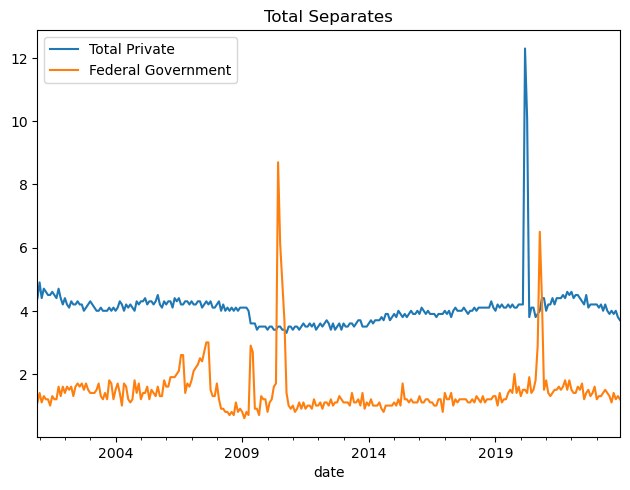

In [82]:
fig, ax = plt.subplots()

for series_id, group in series.groupby('series_id'):
    group.plot(x='date', y='value', ax=ax)

ax.legend(['Total Private', 'Federal Government'])

plt.tight_layout()
plt.title('Total Separates')
plt.show()